In [1]:
import os, glob
import cv2
import matplotlib.pyplot as plt
import numpy as np
import dlib
import pdb

### Choose Picture to Use

###### GET IMAGE PATH

In [2]:
## get face landmark model
model_path = os.getenv('HOME')+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)

## get sticker path
sticker_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/cat-whiskers.png'

In [3]:
def add_sticker(my_image_path):
    try:
        img_show, img_bgr, img_rgb = load_image(my_image_path)
        img_show_rgb, dlib_rects = face_detection(img_show, img_rgb)
        list_landmarks = get_landmarks(img_show,img_show_rgb, img_rgb, dlib_rects)
        x, y, w, h = sticker_location(dlib_rects, list_landmarks)
        img_sticker = attach_sticker(x, y, w, h, img_show, img_bgr)
    except IndexError:
        print('Face Not Detected!')
        print('bounding box: ', dlib_rects)

In [4]:
def load_image(my_image_path):
    img_bgr = cv2.imread(my_image_path)    #- OpenCV로 이미지를 읽어서
    Y= int(img_bgr.shape[0] / 4)
    X= int(img_bgr.shape[1] / 4)
    img_bgr = cv2.resize(img_bgr, (X, Y))    #  각 이미지의 비율에 맞게 resize
    img_show = img_bgr.copy()      #- 출력용 이미지 별도 보관
    img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB) ## convert BGR to RGB
    print(my_image_path)
    plt.imshow(img_rgb)
    plt.show()
    return img_show, img_bgr, img_rgb

In [5]:
def face_detection(img_show, img_rgb):
    detector_hog = dlib.get_frontal_face_detector()   #- detector 선언
    dlib_rects = detector_hog(img_rgb, 1)   #- (image, num of img pyramid)
    if dlib_rects==None:
        pdb.set_trace()
    print(dlib_rects)   # 찾은 얼굴영역 좌표
    
    for dlib_rect in dlib_rects:
        l = dlib_rect.left()
        t = dlib_rect.top()
        r = dlib_rect.right()
        b = dlib_rect.bottom()

        cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

    img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
    plt.imshow(img_show_rgb)
    plt.show()
    return img_show_rgb, dlib_rects

In [6]:
def get_landmarks(img_show, img_show_rgb, img_rgb, dlib_rects):
#     model_path = os.getenv('HOME')+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
#     landmark_predictor = dlib.shape_predictor(model_path)

    list_landmarks = []
    for dlib_rect in dlib_rects:
        points = landmark_predictor(img_rgb, dlib_rect)
        list_points = list(map(lambda p: (p.x, p.y), points.parts()))
        list_landmarks.append(list_points)

    print(len(list_landmarks[0]))

    for landmark in list_landmarks:
        for point in landmark:
            cv2.circle(img_show, point, 2, (0, 255, 255), -1) # yellow

    img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
    plt.imshow(img_show_rgb)
    plt.show()
    return list_landmarks ##img_show_rgb

In [7]:
def sticker_location(dlib_rects, list_landmarks):
    for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
        x = landmark[30][0] - dlib_rect.width()//4
        y = landmark[30][1] - dlib_rect.height()//4
        w = dlib_rect.width() //2
        h = dlib_rect.height() //2
        print ('(x,y) : (%d,%d)'%(x,y))
        print ('(w,h) : (%d,%d)'%(w,h))
    return x, y, w, h

In [8]:
def attach_sticker(x, y, w, h, img_show, img_bgr):
    img_sticker = cv2.imread(sticker_path)
    img_sticker = cv2.resize(img_sticker, (w,h))
    print (img_sticker.shape)
    
    refined_x = x
    refined_y = y
    print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

    sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
    img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
        np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)
    
    
    plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
    plt.show()

    sticker_area = img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
    img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
        np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)
    plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
    plt.show()
    
    return img_sticker

In [9]:
my_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/image*.jpg'
file_names=[]
for file in glob.iglob(my_path):
    file_names= np.append(file_names, file)
file_names = np.sort(file_names)    

#### 정면 사진

/aiffel/aiffel/camera_sticker/images/image00.jpg


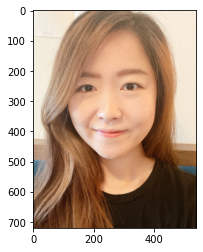

rectangles[[(98, 170) (419, 491)]]


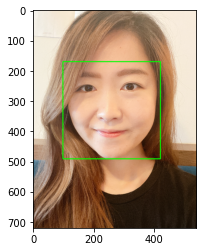

68


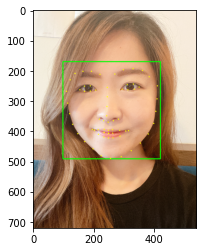

(x,y) : (162,269)
(w,h) : (161,161)
(161, 161, 3)
(x,y) : (162,269)


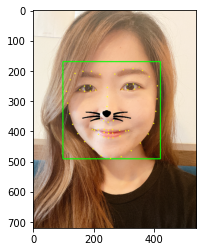

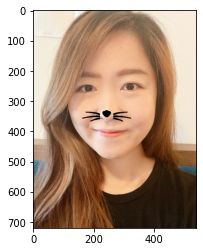

In [10]:
add_sticker(file_names[0])

# for file_name in file_names:
#     add_sticker(file_name)

#### 모자 착용

/aiffel/aiffel/camera_sticker/images/image08.jpg


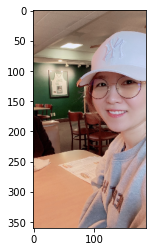

rectangles[[(79, 80) (187, 187)]]


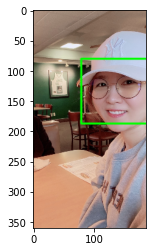

68


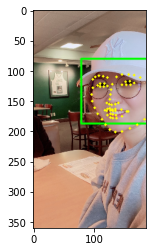

(x,y) : (99,120)
(w,h) : (54,54)
(54, 54, 3)
(x,y) : (99,120)


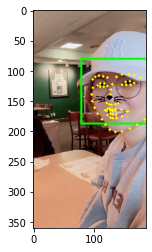

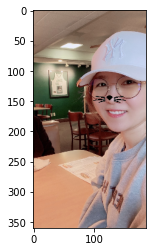

In [11]:
add_sticker(file_names[8])

#### 마스크 착용

/aiffel/aiffel/camera_sticker/images/image11.jpg


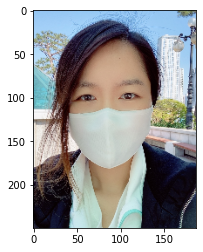

rectangles[[(32, 68) (139, 175)]]


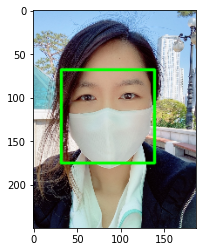

68


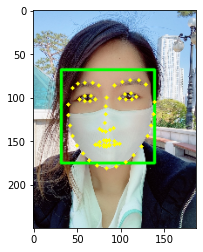

(x,y) : (55,102)
(w,h) : (54,54)
(54, 54, 3)
(x,y) : (55,102)


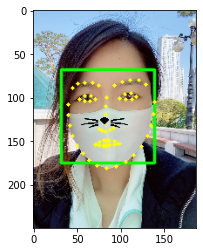

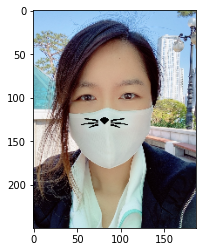

In [12]:
add_sticker(file_names[11])

#### 선글래스 착용,  멀리서 촬영

/aiffel/aiffel/camera_sticker/images/image12.jpg


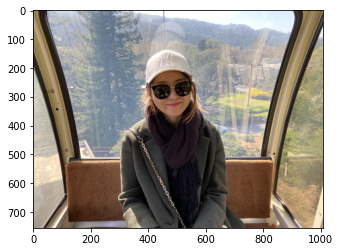

rectangles[[(408, 236) (562, 391)]]


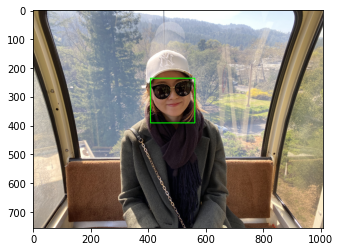

68


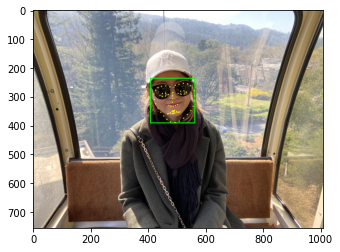

(x,y) : (446,280)
(w,h) : (77,78)
(78, 77, 3)
(x,y) : (446,280)


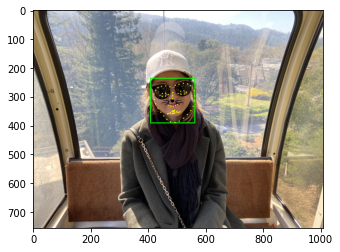

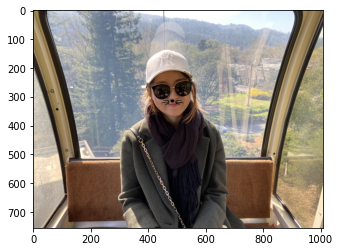

In [16]:
add_sticker(file_names[12])

#### 화질이 낮은 사진

/aiffel/aiffel/camera_sticker/images/image13.jpg


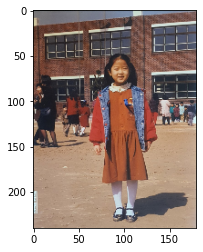

rectangles[]


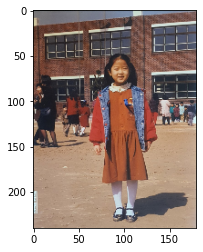

Face Not Detected!
bounding box:  rectangles[]


In [13]:
add_sticker(file_names[-1])


##### 동물 사진


/aiffel/aiffel/camera_sticker/images/_image14.jpg


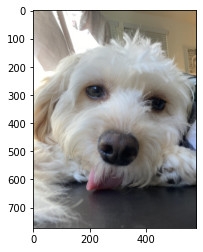

rectangles[]


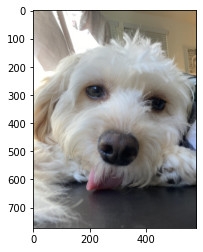

Face Not Detected!
bounding box:  rectangles[]


In [14]:
my_image_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/_image14.jpg'
add_sticker(my_image_path)

## 회고

### 사용한 데이터
- 셀카로 정면 및 옆 방향에서 찍은 사진을 사용하였다.
- 추가적으로 모자, 마스크, 선글래스 착용샷과 셀카보다 멀리서 찍은 사진을 사용하여 비교분석 하였다.

### 진행 방향
- bounding box 로 얼굴을 검출 후 landmark 를 지정하여, 코의 좌표인 [30] 을 사용하였다.
- 스티커는 bounding box의 절반 사이즈로 조절하여 사용하였고, 스티커의 코 부분이 얼굴의 코와 맞춰져야 하므로 top-left 좌표 (x, y) 는 [30] 의 좌표로부터 스티커의 절반 사이즈만큼 씩 조절하였다.
- original 사진의 x 와 y 좌표에서 각각 스티커의 크기만큼 까지를 sticker_area 로 선정하였고, 스티커의 검정색 부분만 기존 사진에 추가 되도록 값을 변경 하였다.

### Analysis
- 가장 어렵고 시간이 걸렸던 것이 좌표를 정확히 맞추는 것이었는데, 간단하게 [30] 좌표를 쓰면서 해결이 되었다.
- 스티커는 top-left 코너의 좌표를 지정하여 원본 사진에 붙이는 방식으로 구현되어 있으므로 현재 코드에서는 기울여지지 않은 정면사진만을 사용하여야 할 것으로 보인다.
- 다만, 이 좌표를 쓰면서 눈 혹은 다른 얼굴 좌표를 사용하여 기울여진 사진에 맞추어 스티커를 tilt 해주면 어느정도 기울어진 사진에서도 잘 붙을 것으로 생각 된다. - 이 또한 왜곡된 사진에서는 사용할 수 없다.
- 모자와 안경을 착용한 사진에서는 HOG 패턴이 잘 검출되는것을 볼 수 있었으나, 멀리서 찍은 사진이나 마스크, 선글래스 착용한 부분에서는 어느정도의 오차가 있음을 볼 수 있다.
- 같은 사진이라도 너무 작게 리사이징 되면 화질이 낮아 인식이 불가능하여 조금 크게 리사이징 할 필요가 있었다.
- (갑자기 궁금해져서..) 추가적으로 화질이 안좋은 사진과 동물 사진으로 해보았으나 예상했던대로 인식이 되지 않았다.

- 스티커 앱은 사용자가 즉각적으로 확인할 수 있어야 하므로 어느정도의 속도개선이 필요하다.
- 또한, 사용자의 재미를 위한 앱이라면 100%의 정확도가 필요하진 않지만 어느정도 잘 된다고 느껴야 지속적으로 사용할 것이므로 위에서 서술한대로 기울기 정도의 기능은 넣어주면 좋을 것으로 보인다.

###### 재밌는 사실..!?!
- 출력된 사진을 찍어서 사용하거나 사람이 아닌 동물은 인식되지 않음
- 마스크를 쓰거나 선글래스를 쓰고 찍은 사진은 오차는 있으나 어느정도 인식은 가능.
- 마스크와 선글라스 두개를 동시에 착용한 사진은 어떨까?? 아예 안잡힐까 오차범위로 나타날까? --> 궁금. 사진 찾아서 테스트 해봐야겠다.